# RLC

In [1]:
# plots will be shown inline 
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy
from numpy import sqrt,floor

import numpy as np
import scipy as sp
from scipy import stats

from scipy.signal import savgol_filter
import pandas as pd
import random
import math

# libreria locale
import my_lib_santanastasio as my



## Analisi Teorica

In [2]:
R_g = 50 #Ohm
R= 325 #Ohm
C= 4.46 * 10**-9 #F
L= 21.45 * 10**-3 #H
R_L = 90 #ohm

# Frequenza di risonanza teorica
w_0 = 1/np.sqrt(L*C)
f_0 = w_0/(2*np.pi)

Z1_0 = R_g + R_L + complex(0, w_0*L) + 1/complex(0,(w_0*C))
Z2_0 = R

# V_out: V ai capi della resistenza
H_0 = Z2_0 / (Z2_0 + Z1_0)

H0_module = np.sqrt( H_0.real**2 + H_0.imag**2 )

print(f"F risonanza: {f_0.round(2)} Hz")
print(f"H di risonanza: {H0_module.round(4)}")

# Fattore Di Qualità Teorico
Q = 1/(R+R_L+R_g)*np.sqrt(L/C)
print(f"Fattore Di Qualità {Q.round(2)}")

# Freq Di Risonanza
f1 = f_0 * ( np.sqrt(1 + (2*Q)**-2 ) - 1/(2*Q) )
f2 = f_0 * ( np.sqrt(1 + (2*Q)**-2 ) + 1/(2*Q) )

print(f"Freq Di Ris1 {f1.round(3)}")
print(f"Freq Di Ris2 {f2.round(3)}")


F risonanza: 16271.93 Hz
H di risonanza: 0.6989
Fattore Di Qualità 4.72
Freq Di Ris1 14638.013
Freq Di Ris2 18088.226


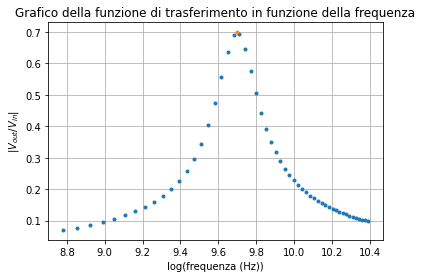

In [3]:


freq= np.arange(f_0*0.4,f_0*2,500) #Hz (intervallo di freq [40%,200%] della freq ris teorica)
omega = freq*2*np.pi

Z1 = np.array([ R_g + R_L + complex(0, w*L) + 1/complex(0,(w*C)) for w in omega ])
Z2 = R
H = Z2 / (Z1 + Z2)

H_module = np.sqrt( H.real**2 + H.imag**2 )

plt.title('Grafico della funzione di trasferimento in funzione della frequenza')
plt.xlabel('log(frequenza (Hz))')
plt.ylabel('$|V_{out}/V_{in}|$')

plt.plot(np.log(freq), H_module, '.')
plt.plot(np.log(f_0),H0_module, '.')
plt.grid()

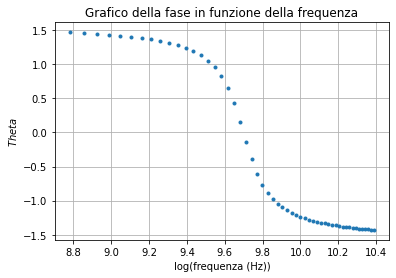

In [4]:
plt.title('Grafico della fase in funzione della frequenza')
plt.xlabel('log(frequenza (Hz))')
plt.ylabel('$Theta$')
plt.plot(np.log(freq), np.arctan(H.imag/H.real), '.')
plt.grid()


## Presa Dati

### Funzione Di trsferimento

In [5]:
df = pd.read_csv('dati_prova_1.csv')
data_f = df['frequenza'].to_numpy() * 1000 #Hz
data_v_out = df['v_out'].to_numpy() #V

V_in = np.array([ 2.48 + np.random.uniform(-1,1)/100 for x in data_v_out]) #V con un fattore random uniforme perchè non ho cazzi di misurare V_in
delta_V_in = 0.03

V_out = V_in - data_v_out #V_in * H_module
delta_V_out = 0.03

pd.DataFrame({
  'Freq [Hz] ':data_f,
  'V_in [V]':V_in.round(2),
  'V_out [V] ': V_out.round(2),
  '|H|':(V_out/V_in).round(3),
})

,Freq [Hz],V_in [V],V_out [V],|H|
0,4000.0,2.48,0.16,0.065
1,7300.0,2.47,0.27,0.111
2,9000.0,2.49,0.37,0.148
3,10000.0,2.49,0.49,0.196
4,13000.0,2.48,0.84,0.338
5,13500.0,2.49,1.01,0.405
6,14000.0,2.48,1.12,0.451
7,14500.0,2.48,1.28,0.516
8,14800.0,2.47,1.39,0.563
9,15000.0,2.48,1.44,0.580


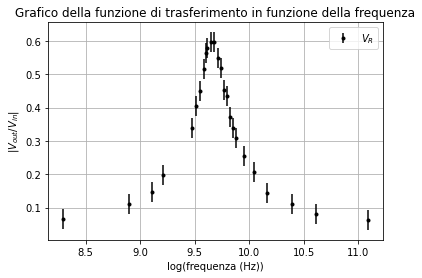

In [6]:
delta_Voi = np.sqrt( ( (1/V_out) * delta_V_in )**2 + ( (V_in/(V_out**2)) * delta_V_out )**2  )

plt.title('Grafico della funzione di trasferimento in funzione della frequenza')
plt.xlabel('log(frequenza (Hz))')
plt.ylabel('$|V_{out}/V_{in}|$')
plt.errorbar(np.log(data_f), V_out/V_in, yerr=delta_V_out, fmt='.k',label='$V_R$');
plt.grid()
plt.legend()
plt.show()

### Frequenze Di Risonanza

In [7]:

# plt.title('Grafico della funzione di trasferimento vicino alla f di taglio 1')
# plt.xlabel('frequenza (Hz)')
# plt.ylabel('$|V_{out}/V_{in}|$')
# #plt.xscale('log')
# plt.errorbar(data_f[idx-4:idx], (V_out/V_in)[idx-4:idx], yerr=delta_Voi[idx-4:idx], fmt='.k',label='$V_R$');
# plt.grid()

m         =  0.0001
sigma(m)  =  0.0
c         =  -1.4057
sigma(c)  =  0.2897
cov(m, c) =  -0.0
rho(m, c) =  -0.9996


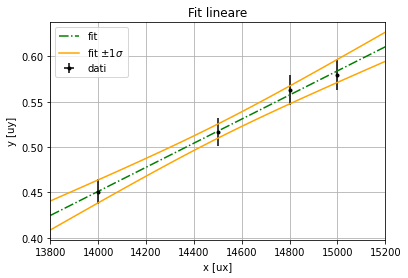

In [8]:
# Analizzo 4 punti prima della risonanza per trovare f_taglio_1

x=data_f[6:10]
y=(V_out/V_in)[6:10]

uy= np.array(y*0.03)  #np.repeat(0.03,len(y))
ux= np.array(x*0.05) #np.repeat(0.05,len(x))

ms1, sms1, cs1, scs1, covs1,rhos1= my.lin_fit(x, y, uy, "x [ux]", "y [uy]", plot=True,verbose=True ,setrange=False)



In [9]:
# plt.title('Grafico della funzione di trasferimento vicino alla f di taglio 1')
# plt.xlabel('frequenza (Hz)')
# plt.ylabel('$|V_{out}/V_{in}|$')
# #plt.xscale('log')
# plt.errorbar(freq[11:15], (V_out/V_in)[11:15], yerr=delta_Voi[11:15], fmt='.k',label='$V_R$');
# plt.grid()

m         =  -0.0001
sigma(m)  =  0.0
c         =  1.8616
sigma(c)  =  0.1862
cov(m, c) =  -0.0
rho(m, c) =  -0.9996


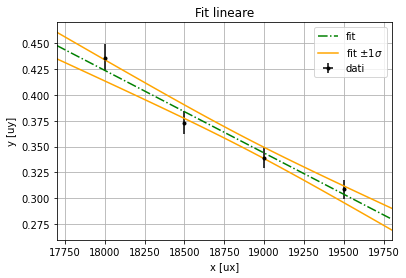

In [10]:
x=data_f[15:19]
y=(V_out/V_in)[15:19]

uy= np.array(y*0.03)  #np.repeat(0.03,len(y))
ux= np.array(x*0.05) #np.repeat(0.05,len(x))

ms2, sms2, cs2, scs2, covs2,rhos2= my.lin_fit(x, y, uy, "x [ux]", "y [uy]", plot=True,verbose=True ,setrange=False)

In [11]:
H_risonanza = np.max(V_out/V_in)/np.sqrt(2)


f1_s = (H_risonanza - cs1) / ms1
delta_f1_s = np.sqrt(((-1/ms1)*scs1)**2 + ( ( ( H_risonanza - cs1) / ms1**2) * sms1 )**2 )

z1 = (f1 - f1_s)/delta_f1_s

print(f"Freq Di Ris1 {f1.round(2)}")
print(f"Freq Ris1 Sperimentale: {f1_s.round(2)} +/ {delta_f1_s.round(2)}")
print(f"z_test: {z1.round(2)} \n\n")

f2_s = (H_risonanza - cs2) / ms2
delta_f2_s = np.sqrt(((-1/ms2)*scs2)**2 + ( ( ( H_risonanza - cs2) / ms2**2) * sms2 )**2 )

z2 = (f2 - f2_s)/delta_f2_s


print(f"Freq Di Ris2 {f2.round(2)}")
print(f"Freq Ris2 Sperimentale: {f2_s.round(2)} +/ {delta_f2_s.round(2)}")
print(f"z_test: {z2.round(2)}")




Freq Di Ris1 14638.01
Freq Ris1 Sperimentale: 13774.26 +/ 3011.66
z_test: 0.29 


Freq Di Ris2 18088.23
Freq Ris2 Sperimentale: 18030.16 +/ 3222.59
z_test: 0.02


In [12]:
f_ris = 16500 
Q_mis = f_ris/( f2_s - f1_s )
Q_mis

print(f"Fattore Qualità Misurato {Q_mis.round(4)}")
print(f"Larghezza Banda Passante B_f {(f2_s - f1_s).round(1)}[Hz]")



Fattore Qualità Misurato 3.877
Larghezza Banda Passante B_f 4255.9[Hz]


### Fase

,Freq [Hz],dt [us],Theta [deg]
0,9000.0,-26.0,1.470
1,10300.0,-22.0,1.424
2,12000.0,-18.0,1.357
3,13000.0,-14.0,1.144
4,14000.0,-10.0,0.880
5,14500.0,-7.0,0.638
6,15000.0,-5.0,0.471
7,15500.0,-1.0,0.097
8,16000.0,3.0,-0.302
9,16500.0,5.0,-0.518


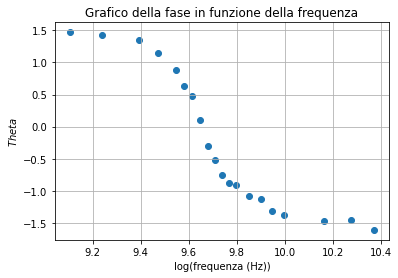

In [13]:
df = pd.read_csv('dati_prova_2.csv')
data_f = df['frequenza'].to_numpy() * 1000 #Hz
data_dt = df['dt'].to_numpy() * 10**-6 #s

plt.title('Grafico della fase in funzione della frequenza')
plt.xlabel('log(frequenza (Hz))')
plt.ylabel('$Theta$')
plt.scatter(np.log(data_f[:]) ,-data_dt[:]*2*np.pi*data_f)
plt.grid()

pd.DataFrame({
  'Freq [Hz]':data_f,
  'dt [us]': data_dt*10**6,
  'Theta [deg]': (-data_dt[:]*2*np.pi*data_f).round(3),
}
)
